# **UMAP vs. t-SNE**

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
from sklearn.datasets import load_digits

# Load dataset (Digits dataset: 1797 samples, 64 features)
digits = load_digits()

X = digits.data  # High-dimensional input (64D)
y = digits.target  # Labels (0-9)

In [38]:
X.shape, y.shape

((1797, 64), (1797,))

In [39]:
list(set(y))  # Labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# **1- Using t-SNE (t-Distributed Stochastic Neighbor Embedding)**

- t-SNE is a *nonlinear* dimensionality reduction technique primarily used for visualizing high-dimensional data in 2D or 3D space.

- It is particularly useful for exploring clusters in data.

In [40]:
from sklearn.manifold import TSNE

In [41]:
# Apply t-SNE
tsne_model = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)  # 2D
X_tsne = tsne_model.fit_transform(X)

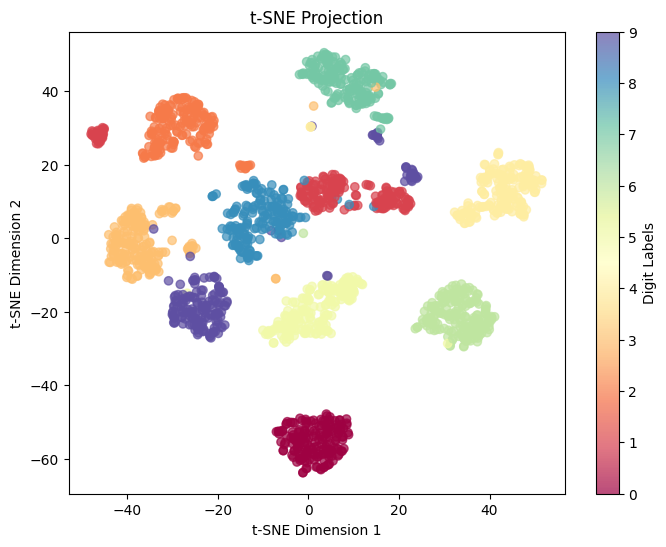

In [42]:
# Plot t-SNE results
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Spectral', alpha=0.7)
plt.colorbar(scatter, label="Digit Labels")
plt.title("t-SNE Projection")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

---

# **2- UMAP (Uniform Manifold Approximation and Projection)**

- **UMAP** is *a dimensionality reduction algorithm* similar to t-SNE but is faster, scales better, and preserves more of the global structure in high-dimensional data. UMAP models data as a weighted graph.

## **Key Insights:**
- Constructs a **fuzzy similarity graph** in high-dimensional space.
- Uses **Laplacian kernel** for low-dimensional projections.
- Optimizes **cross-entropy loss** with gradient descent.
- Runs significantly faster than t-SNE (scales well to 100,000+ points).

In [43]:
!pip install umap-learn

In [44]:
import umap

In [45]:
# Apply UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean')
X_umap = umap_model.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


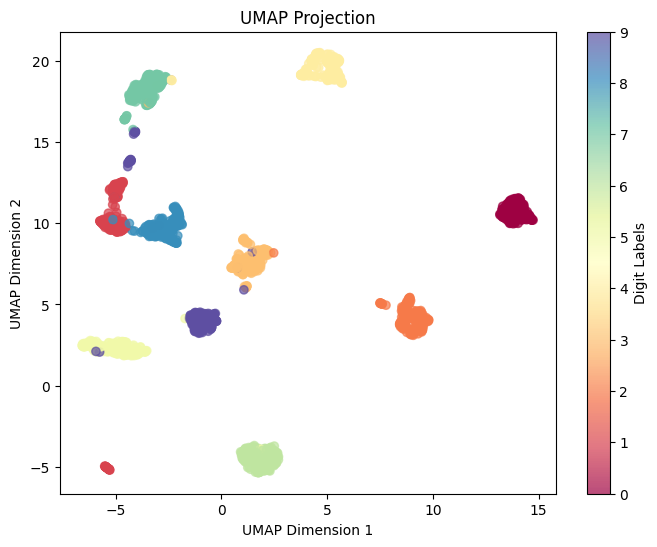

In [46]:
# Plot UMAP results
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', alpha=0.7)
plt.colorbar(scatter, label="Digit Labels")
plt.title("UMAP Projection")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()

---

# **Key Observations ⏳**

- **UMAP** is faster (especially on large datasets).

- **t-SNE** tends to form clusters but does not preserve global structure well.

- **UMAP** preserves both local and global structure, making it good for general visualization.

- **t-SNE** is good for fine-grained clustering, but it can struggle with very large datasets.